1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  


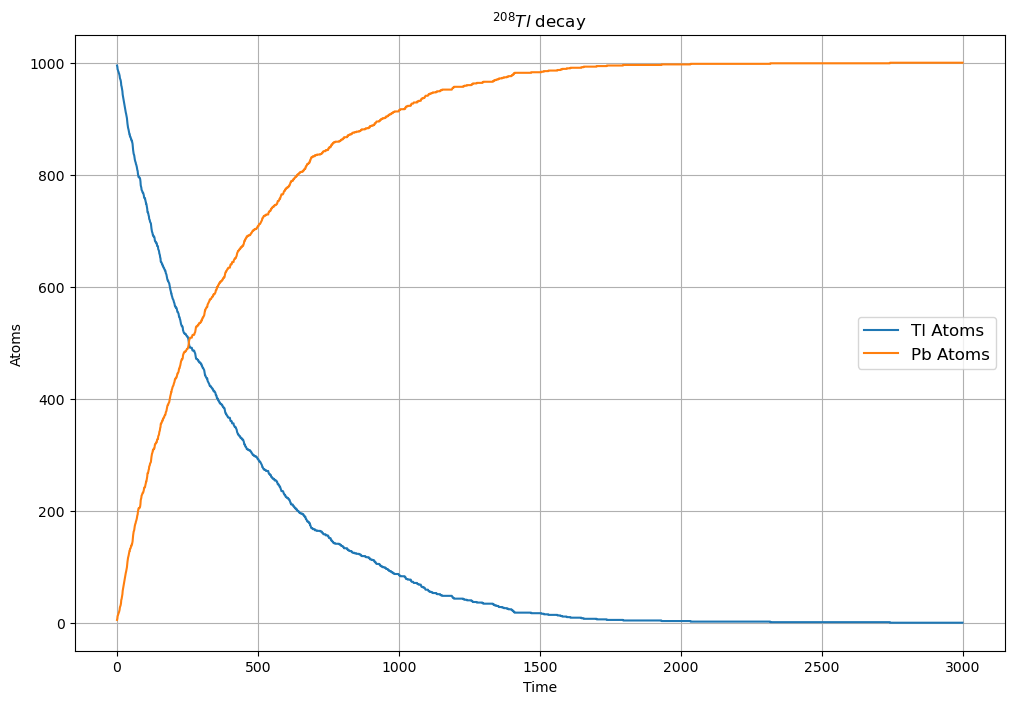

In [19]:
import numpy as np
import matplotlib.pyplot as plt 

InitialTl, InitialPb = 1000, 0
tHalf = 3.052*60
tau = tHalf/np.log(2)
DeltaT = 1
DecayProb = lambda t: 1-2**(-t/tau)
t = np.arange(1, 3000)

Atoms = {
   'Tl': [InitialTl],
   'Pb': [InitialPb]
}

for i in t:

   Decayed = np.sum(np.random.rand(Atoms['Tl'][i-1]) < DecayProb(DeltaT))

   Atoms['Tl'].append(Atoms['Tl'][i-1] - Decayed)
   Atoms['Pb'].append(Atoms['Pb'][i-1] + Decayed)



plt.figure(figsize=(12, 8))
plt.plot(t, Atoms['Tl'][1:], label="Tl Atoms")
plt.plot(t, Atoms['Pb'][1:], label="Pb Atoms")

plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Atoms")
plt.title(r"$^{208}Tl$ decay ")
plt.legend(fontsize = 12)



* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

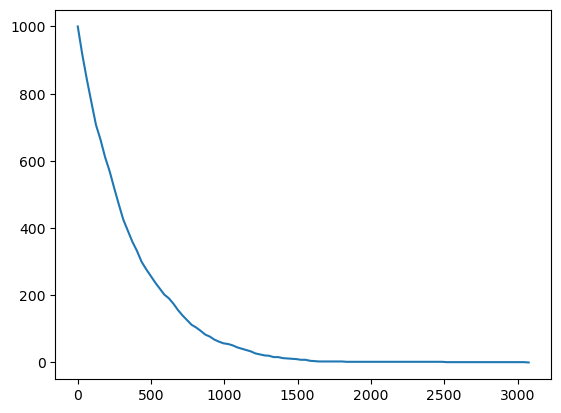

In [25]:
InvFunc = lambda U: np.log2(1-U)*(-tau)

Decayed = InvFunc(np.random.random(InitialTl))

time = np.linspace(0, np.max(Decayed), 100)
Undecayed_counts = [np.sum(Decayed > t) for t in time]

plt.plot(time, Undecayed_counts)



2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [26]:
import numpy as np

# Constants
Z = 79  # Atomic number of gold
e = 1.602e-19  # Elementary charge in Coulombs
epsilon_0 = 8.854e-12  # Permittivity of free space in F/m
E = 7.7e6 * e  # Energy in Joules (convert MeV to Joules)
a0 = 5.29177e-11  # Bohr radius in meters
sigma = a0 / 100  # Standard deviation of the Gaussian beam

# Maximum impact parameter for bouncing particles
b_max = (Z * e**2) / (2 * np.pi * epsilon_0 * E)

# Number of particles
num_particles = 1_000_000

# Generate random impact parameters (b_x and b_y)
b_x = np.random.normal(0, sigma, num_particles)
b_y = np.random.normal(0, sigma, num_particles)

# Compute the distance b for each particle
b = np.sqrt(b_x**2 + b_y**2)

# Count particles with b < b_max
bouncing_particles = np.sum(b < b_max)

# Fraction of bouncing particles
fraction_bouncing = bouncing_particles / num_particles

print(f"Fraction of particles that bounce back: {fraction_bouncing:.5f}")

Fraction of particles that bounce back: 0.00158


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [ ]:
import tqdm

Func = lambda x: np.sin(1/(x*(2-x)))**2

def MH(N):
   counts = 0

   x = 2*np.random.random(N)
   y = np.random.random(N)

   AreaMH = 2*(np.sum(y < Func(x)))/N
   return AreaMH

def MV(N):
   countsMV = np.sum(Func(2*np.random.random(N)))
   AreaMV = 2*countsMV/N
   return AreaMV


AreaMH, AreaMV = [], []
N = np.arange(10, 1e7, 5000)


for i in tqdm.tqdm(N):
   AreaMH.append(MH(int(i)))
   AreaMV.append(MV(int(i)))


#print(f"Area evaluated with miss hit method using {N} points: {AreaMH}")
#print(f"Area evaluated with mean value method using {N} points: {AreaMV}")

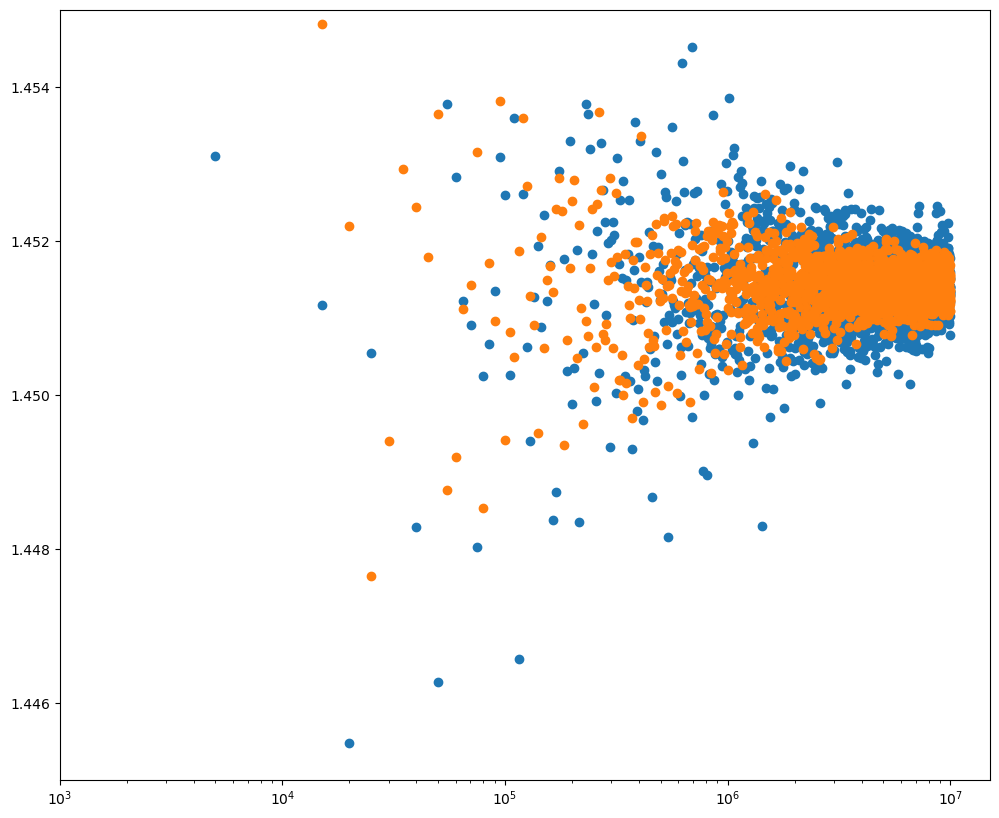

In [48]:
plt.figure(figsize=(12, 10))
plt.scatter(N, AreaMH)
plt.scatter(N, AreaMV)
plt.xlim(1000, 1.5e7)
plt.ylim(1.445, 1.455)
plt.xscale('log')

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [74]:
N = int(1e6)

x = np.random.random(N)
y = np.random.random(N)

Area = (np.sum(x**2 + y**2 < 1))/N
print(f"The area of a circle using {N} points is: {4*Area}")

#n-D

#number of dimensions:
n = 20

RandomVariable = np.random.uniform(-1, 1, (n, N))

Counts_nDim = np.sum(np.sum(RandomVariable**2, axis= 0) <= 1)


#2**10 is the volume of the 10-th dimesnional cube 

Area_nD = 2**n/N * Counts_nDim
print(f"The area of a circle {n} dimensiona, using {N} points is: {Area_nD}")



The area of a circle using 1000000 points is: 3.139024
The area of a circle 20 dimensiona, using 1000000 points is: 0.0


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

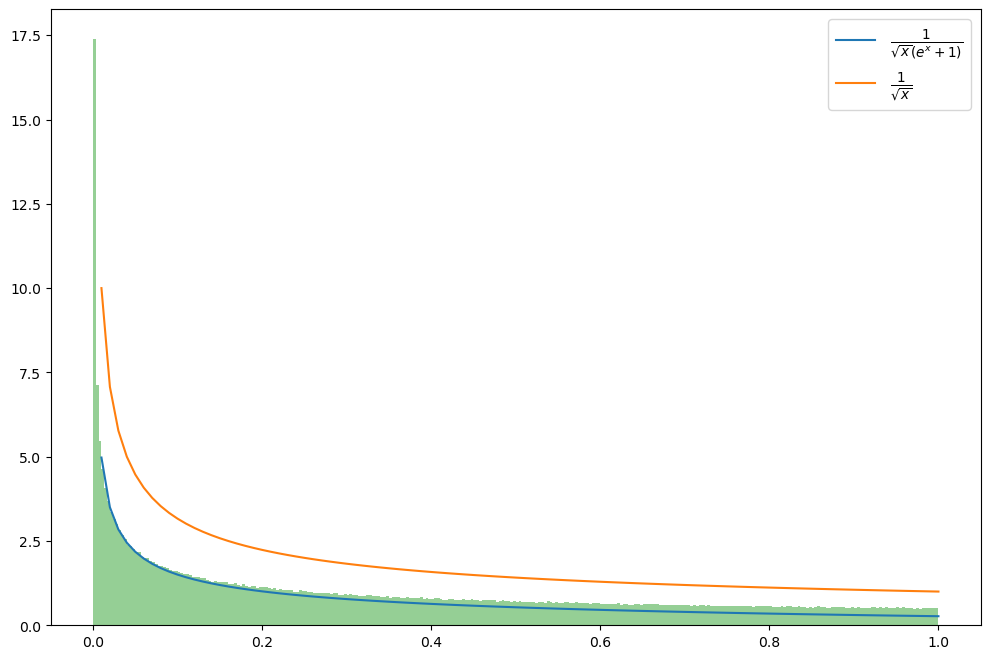

In [92]:
Func = lambda x: 1/(np.sqrt(x) * (np.exp(x) + 1)) 
w = lambda x: 1/np.sqrt(x)

#Drawing points from the distribution 1/sqrt(x) using the inverse method:
N = int(1e6)

RandomX = np.random.random( N)**2
I = 2
Area = 1/N * np.sum(Func(RandomX)/w(RandomX))* I

x = np.linspace(0.01, 1, 100)


plt.figure(figsize=(12, 8))
plt.plot(x, Func(x), label=r"$\frac{1}{\sqrt{x}\left(e^x + 1\right)}$")
plt.plot(x, w(x), label=r"$\frac{1}{\sqrt{x}}$")

plt.hist(RandomX, density = True, bins = 300, alpha = 0.5)
plt.legend(fontsize = 14)
plt.show()